There are many specialized packages for dealing with data analysis and statistical programming. One very important code that you will see in MATH1024, Introduction to Probability and Statistics, is [R](http://www.r-project.org/). A python package for performing similar analysis of large data sets is [pandas](http://pandas.pydata.org/). However, simple statistical tasks on simple data sets can be tackled using `numpy` and `scipy`.

# Getting data in

A data file containing the monthly rainfall for Nashville, Tennessee, can be [downloaded from this link](https://github.com/IanHawke/maths-with-python/blob/master/nashville_precip.txt). We will save that file locally, and then look at the data.

The first few lines of the file are:

In [1]:
!head nashville_precip.txt

# Year	Jan	Feb	Mar	Apr	May	Jun	Jul	Aug	Sep	Oct	Nov	Dec
1871	2.76	4.58	5.01	4.13	3.30	2.98	1.58	2.36	0.95	1.31	2.13	1.65
1872	2.32	2.11	3.14	5.91	3.09	5.17	6.10	1.65	4.50	1.58	2.25	2.38
1873	2.96	7.14	4.11	3.59	6.31	4.20	4.63	2.36	1.81	4.28	4.36	5.94
1874	5.22	9.23	5.36	11.84	1.49	2.87	2.65	3.52	3.12	2.63	6.12	4.19
1875	6.15	3.06	8.14	4.22	1.73	5.63	8.12	1.60	3.79	1.25	5.46	4.30
1876	6.41	2.22	5.28	3.62	3.40	5.65	7.15	5.77	2.52	2.68	1.26	0.95
1877	4.05	1.06	4.98	9.47	1.25	6.02	3.25	4.16	5.40	2.61	4.93	2.49
1878	3.34	2.10	3.48	6.88	2.33	3.28	9.43	5.02	1.28	2.17	3.20	6.04
1879	6.32	3.13	3.81	2.88	2.88	2.50	8.47	4.62	5.18	2.90	5.85	9.15


We can use `numpy` to load this data into a variable, where we can manipulate it. This is not ideal: it will lose the information in the header, and that the first column corresponds to years. However, it is simple to use.

In [2]:
import numpy

In [3]:
data = numpy.loadtxt('nashville_precip.txt')

In [4]:
data

array([[  1.87100000e+03,   2.76000000e+00,   4.58000000e+00, ...,
          1.31000000e+00,   2.13000000e+00,   1.65000000e+00],
       [  1.87200000e+03,   2.32000000e+00,   2.11000000e+00, ...,
          1.58000000e+00,   2.25000000e+00,   2.38000000e+00],
       [  1.87300000e+03,   2.96000000e+00,   7.14000000e+00, ...,
          4.28000000e+00,   4.36000000e+00,   5.94000000e+00],
       ..., 
       [  2.00900000e+03,   4.59000000e+00,   2.85000000e+00, ...,
          6.49000000e+00,   6.70000000e-01,   3.99000000e+00],
       [  2.01000000e+03,   4.13000000e+00,   2.77000000e+00, ...,
          2.49000000e+00,   5.41000000e+00,   1.87000000e+00],
       [  2.01100000e+03,   2.31000000e+00,   5.54000000e+00, ...,
          9.30000000e-01,   6.15000000e+00,   4.25000000e+00]])

We see that the first column - the year - has been converted to a floating point number, which is not helpful. However, we can now split the data using standard `numpy` operations:

In [5]:
years = data[:, 0]
rainfall = data[:, 1:]

We can now plot, for example, the rainfall in January for all years:

In [6]:
%matplotlib inline
from matplotlib import pyplot

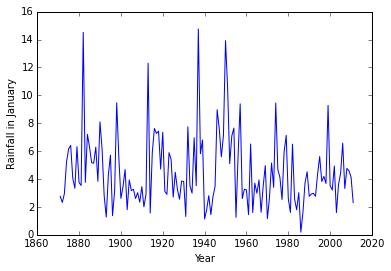

In [7]:
pyplot.plot(years, rainfall[:,0])
pyplot.xlabel('Year')
pyplot.ylabel('Rainfall in January');

# Basic statistical functions

`numpy` contains a number of basic statistical functions, such as `min`, `max` and `mean`. These will act on entire arrays to give the "all time" minimum, maximum, and average rainfall:

In [8]:
print("Minimum rainfall: {}".format(rainfall.min()))
print("Maximum rainfall: {}".format(rainfall.max()))
print("Mean rainfall: {}".format(rainfall.mean()))

Minimum rainfall: 0.0
Maximum rainfall: 16.43
Mean rainfall: 3.9247695035461


Of more interest would be either

1. the mean (min/max) rainfall in a given month for all years, or
2. the mean (min/max) rainfall in a given year for all months.

So the mean rainfall in the first year, 1871, would be

In [9]:
print ("Mean rainfall in 1871: {}".format(rainfall[0, :].mean()))

Mean rainfall in 1871: 2.728333333333333


Whilst the mean rainfall in January, averaging over all years, would be

In [10]:
print ("Mean rainfall in January: {}".format(rainfall[:, 0].mean()))

Mean rainfall in January: 4.523687943262411


If we wanted to plot the mean rainfall per year, across all years, this would be tedious - there are 141 years of data in the file. Even computing the mean rainfall in each month, across all years, would be bad with 12 months. We could write a loop. However, `numpy` allows us to apply a function along an axis of the array, which does this is one operation:

In [11]:
mean_rainfall_in_month = rainfall.mean(axis=0)
mean_rainfall_per_year = rainfall.mean(axis=1)

The `axis` argument gives the direction we want to *keep* - that we do not apply the operation to. For this data set, each row contains a year and each column a month. To find the mean in a given month we want to keep the row information (`axis` 0) and take the mean over the column. To find the mean in a given year we want to keep the column information (`axis` 1) and take the mean over the row.

We can now plot how the mean varies with each year.

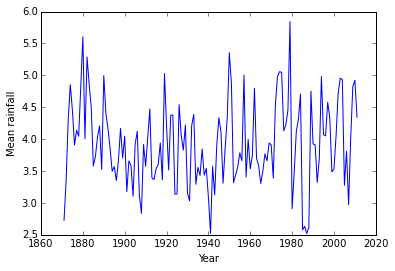

In [12]:
pyplot.plot(years, mean_rainfall_per_year)
pyplot.xlabel('Year')
pyplot.ylabel('Mean rainfall');

We can also compute the standard deviation:

In [13]:
std_rainfall_per_year = rainfall.std(axis=1)

We can then add confidence intervals to the plot:

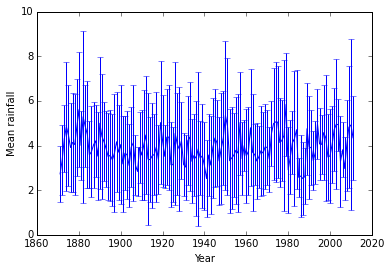

In [14]:
pyplot.errorbar(years, mean_rainfall_per_year, yerr = std_rainfall_per_year)
pyplot.xlabel('Year')
pyplot.ylabel('Mean rainfall');

This isn't particularly pretty or clear: a nicer example would use better packages, but a quick fix uses an alternative `matplotlib` approach:

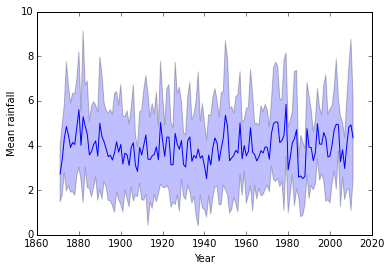

In [15]:
pyplot.plot(years, mean_rainfall_per_year)
pyplot.fill_between(years, mean_rainfall_per_year - std_rainfall_per_year, 
                    mean_rainfall_per_year + std_rainfall_per_year,
                    alpha=0.25, color=None)
pyplot.xlabel('Year')
pyplot.ylabel('Mean rainfall');

# Categorical data

Looking at the means by month, it would be better to give them names rather than numbers. We will also summarize the available information using a boxplot:

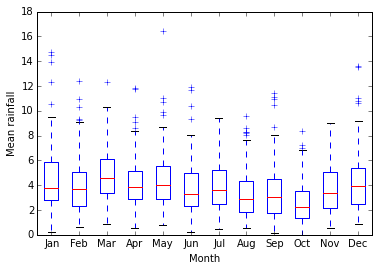

In [16]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pyplot.boxplot(rainfall, labels=months)
pyplot.xlabel('Month')
pyplot.ylabel('Mean rainfall');

Much better ways of working with categorical data are available through more specialized packages.

# Regression

We can go beyond the basic statistical functions in `numpy` and look at other standard tasks. For example, we can look for simple trends in our data with a *linear regression*. There is a function to compute the linear regression in `scipy` we can use. We will use this to see if there is a trend in the mean yearly rainfall:

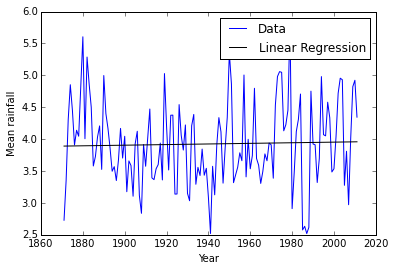

In [17]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_rainfall_per_year)

pyplot.plot(years, mean_rainfall_per_year, 'b-', label='Data')
pyplot.plot(years, intercept + slope*years, 'k-', label='Linear Regression')
pyplot.xlabel('Year')
pyplot.ylabel('Mean rainfall')
pyplot.legend();

In [18]:
print("The change in rainfall (the slope) is {}.".format(slope))
print("However, the error estimate is {}.".format(std_err))
print("The probability that the rainfall is correlated"
      " with the year is {}.".format(r_value))
print("The probability that the slope is zero is {}.".format(p_value))

The change in rainfall (the slope) is 0.00047922998986828685.
However, the error estimate is 0.0013797572110603332.
The probability that the rainfall is correlated with the year is 0.029447303733240587.
The probability that the slope is zero is 0.7288693468821608.


Unsurprisingly, it looks like there's no significant change in mean rainfall with time.

# Random numbers

Random processes and random variables may be at the heart of probability and statistics, but computers cannot generate anything "truly" random. Instead they can generate *pseudo-random* numbers using random number generators (RNGs). Constructing a random number generator is a *hard problem* and wherever possible you should use a well-tested RNG rather than attempting to write your own.

Python has many ways of generating random numbers. Perhaps the most useful are given by the [`numpy.random`](http://docs.scipy.org/doc/numpy/reference/routines.random.html) module, which can generate a `numpy` array filled with random numbers from various distributions. For example:

/Users/ih3/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


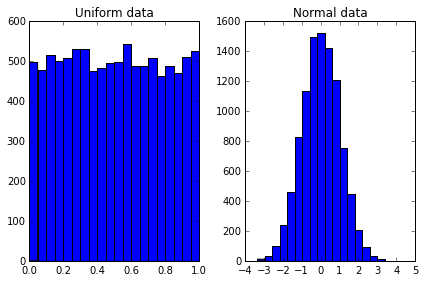

In [19]:
from numpy import random

uniform = random.rand(10000)
normal = random.randn(10000)

fig = pyplot.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(uniform, 20)
ax1.set_title('Uniform data')
ax2.hist(normal, 20)
ax2.set_title('Normal data')
fig.tight_layout()
fig.show();

## More distributions

Whilst the standard distributions are given by the convenience functions above, the [full documentation of `numpy.random`](http://docs.scipy.org/doc/numpy/reference/routines.random.html) shows many other distributions available. For example, we can draw $10,000$ samples from the [Beta distribution](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.beta.html#numpy.random.beta) using the parameters $\alpha = 1/2 = \beta$ as

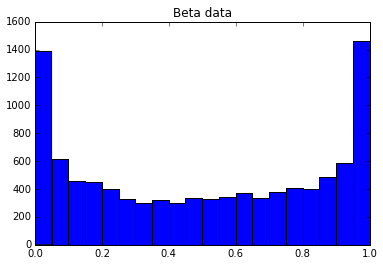

In [20]:
beta_samples = random.beta(0.5, 0.5, 10000)

pyplot.hist(beta_samples, 20)
pyplot.title('Beta data')
pyplot.show();

We can do this $5,000$ times and compute the mean of each set of samples:

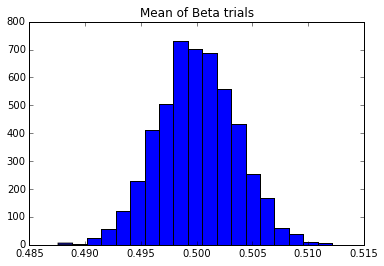

In [21]:
n_trials = 5000
beta_means = numpy.zeros((n_trials,))

for trial in range(n_trials):
    beta_samples = random.beta(0.5, 0.5, 10000)
    beta_means[trial] = numpy.mean(beta_samples)
    
pyplot.hist(beta_means, 20)
pyplot.title('Mean of Beta trials')
pyplot.show();

Here we see the *Central Limit Theorem* in action: the distribution of the means appears to be normal, despite the distribution of any individual trial coming from the Beta distribution, which looks very different.